# M2 - WEEK 5 | PROJECT: Visualizing Data for Different Teams

This jupyter notebook is intended so serve as input for our presentation.
We are working on a Super Store Sales. 
Let's prepare everything by importing modules and dataset. For the dataset csv file, we had to change it's format to UFT8.

In [4]:
# Modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# dataset
ssd = pd.read_csv('my_superstore_dataset2011-2015.csv')

Let's see what' inside our dataset

In [5]:
ssd.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,...,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,...,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,...,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,...,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


List all columns names

In [6]:
ssd.dtypes

Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In order, those columns are reffering to sales of our store by order and crossed to order date ship date, mode and many other variables describing the product, sales, and data on customers.

# CEO

As CEO, the main point is to see main insights of the business. Are we making profit ? Yes ? No ? Why ?

Number of orders in the whole dataset

In [46]:
len(ssd.index)

51290

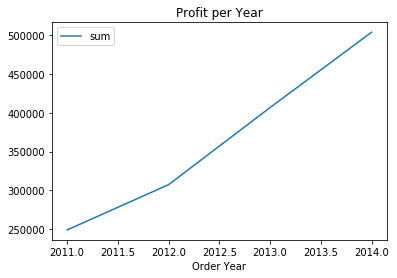

In [59]:
year_pro = ssd[['Order Year', 'Profit']]
ceo1 = year_pro.groupby(["Order Year"]).agg(['sum'])
a1 = ceo1['Profit'].plot.line(title ='Profit per Year', legend = 'Value in usd')

Profit are growing constantly. Since 2012 we can notice a positive shift in that growth.

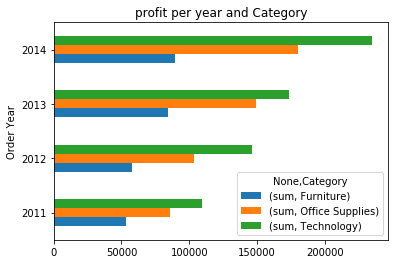

In [34]:
year_seg_sal = ssd[['Order Year', 'Category', 'Profit']]
g_y_s_s = year_seg_sal.groupby(["Order Year", "Category"]).agg(['sum'])
a1 = g_y_s_s['Profit'].unstack().plot.barh(title ='profit per year and Category', legend = 'Value in usd')

In terms of profit, most of the profit is coming from technology products. But furniture's profits are almost stable. Why does furniture products bring less profit ?

In [72]:
corr = ssd.corr()
corr.style.background_gradient(cmap='coolwarm')

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost,Order Year
Row ID,1,0.00967103,-0.0438889,-0.173483,0.0875941,-0.0190371,-0.0390782,-0.000920929
Postal Code,0.00967103,1,-0.0238538,0.0127607,0.0584431,-0.0299612,-0.0254491,0.00453869
Sales,-0.0438889,-0.0238538,1,0.313577,-0.0867219,0.484918,0.768073,-0.00290483
Quantity,-0.173483,0.0127607,0.313577,1,-0.0198747,0.104365,0.272649,-0.00504926
Discount,0.0875941,0.0584431,-0.0867219,-0.0198747,1,-0.31649,-0.0790556,-0.00589394
Profit,-0.0190371,-0.0299612,0.484918,0.104365,-0.31649,1,0.354441,0.00262627
Shipping Cost,-0.0390782,-0.0254491,0.768073,0.272649,-0.0790556,0.354441,1,-0.00313638
Order Year,-0.000920929,0.00453869,-0.00290483,-0.00504926,-0.00589394,0.00262627,-0.00313638,1


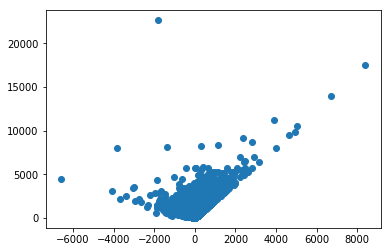

In [70]:
plt.scatter(ssd['Profit'], ssd['Sales'])
plt.show()

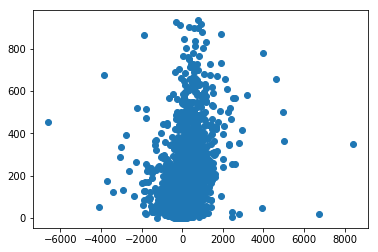

In [69]:
plt.scatter(ssd['Profit'], ssd['Shipping Cost'])
plt.show()

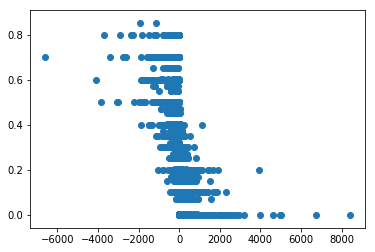

In [71]:
plt.scatter(ssd['Profit'], ssd['Discount'])
plt.show()

Profit is mostly correlated to  shipping cost, sales and discount. But the highest correlation is linked to the sales; so the profit depends on the sales. Let's then see closer these sales.

# Sales Manager

Let's now go deeper in our data.

In [104]:
ssd["Order Date"] = pd.to_datetime(ssd["Order Date"])
ssd["Order Year"] = ssd["Order Date"].dt.year

2011 to 2015  number of items sold

In [62]:
year_qt_sal = ssd[['Order Year', 'Quantity', 'Sales']]
year_qt_sal.groupby("Order Year")['Quantity'].agg(['count']).rename(columns ={'count' : 'Number of orders'})

,Number of orders
Order Year,
2011,8998
2012,10962
2013,13799
2014,17531


Number of orders by year

In [63]:
graph_year_qt_sal = pd.DataFrame(year_qt_sal.groupby("Order Year").agg(['sum']))

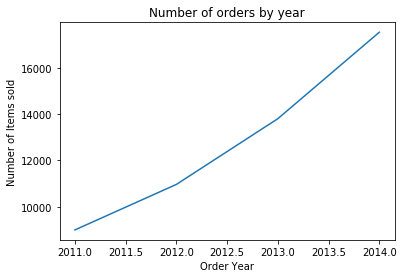

In [53]:
#number or orders
plt.plot(year_qt_sal.groupby("Order Year")['Quantity'].agg(['count']))
plt.title('Number of orders by year')
plt.xlabel('Order Year')
plt.ylabel('Number of Items sold')
plt.show()

The number of orders are growing normally.

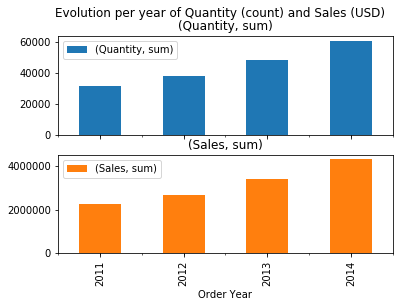

In [55]:
ax = graph_year_qt_sal.plot(kind = 'bar', subplots = True, title ='Evolution per year of Quantity (count) and Sales (USD)')
ax[1].legend(loc=2)

Quantity of sold items and sales values are constatly growing from 2011 to 2014.

In [ ]:
ax = graph_year_qt_pro.plot(kind = 'bar', subplots = True, title ='Evolution per year of Quantity (count) and Sales (USD)')
ax[1].legend(loc=2)

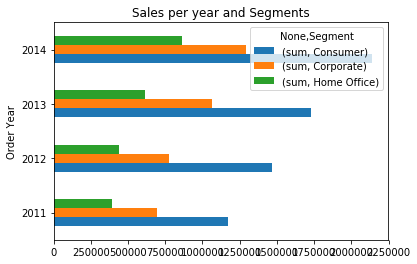

In [21]:
year_seg_sal = ssd[['Order Year', 'Segment', 'Sales']]
g_y_s_s = year_seg_sal.groupby(["Order Year", "Segment"]).agg(['sum'])
a1 = g_y_s_s['Sales'].unstack().plot.barh(title ='Sales per year and Segments', legend = 'Value in usd')

By watching closely we can see that Consumer sales are the main in terms of share of sales and Home Office sales are the last.

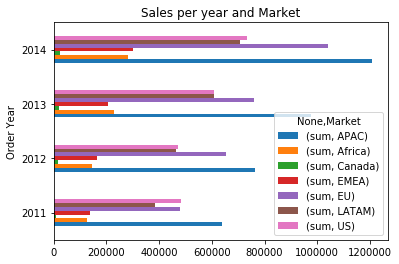

In [24]:
year_seg_sal = ssd[['Order Year', 'Market', 'Sales']]
g_y_s_s = year_seg_sal.groupby(["Order Year", "Market"]).agg(['sum'])
a1 = g_y_s_s['Sales'].unstack().plot.barh(title ='Sales per year and Market', legend = 'Value in usd')

Asia and Pacific (APAC) Countries a the leading areas in terms of sales, closely followed by European Union (EU)

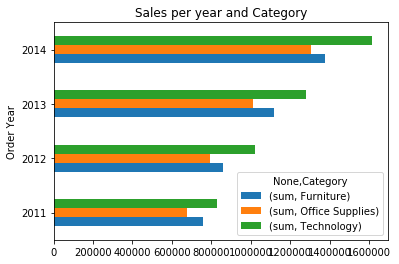

In [78]:
year_cat_sal = ssd[['Order Year', 'Category', 'Sales']]
g_y_s_s = year_cat_sal.groupby(["Order Year", "Category"]).agg(['sum'])
a1 = g_y_s_s['Sales'].unstack().plot.barh(title ='Sales per year and Category', legend = 'Value in usd')

In [32]:
year_cat_sal.groupby(["Order Year", "Category"]).describe()

Sales                                 \
                              count        mean         std    min   
Order Year Category                                                  
2011       Furniture         1762.0  429.167074  557.124509  3.480   
           Office Supplies   5446.0  124.055536  331.421600  0.852   
           Technology        1790.0  462.375453  827.518952  1.980   
2012       Furniture         2045.0  420.001251  580.295811  2.960   
           Office Supplies   6707.0  118.546985  270.019263  0.984   
           Technology        2210.0  463.095706  590.528578  2.376   
2013       Furniture         2722.0  410.625846  531.519635  2.328   
           Office Supplies   8391.0  120.452585  301.698677  0.836   
           Technology        2686.0  475.541792  746.708241  1.980   
2014       Furniture         3347.0  411.728620  551.175965  1.892   
           Office Supplies  10729.0  121.693681  297.731040  0.444   
           Technology        3455.0  467.773856  681.467365  0.990   

                                                                        
                                   25%       50%        75%        max  
Order Year Category                                                     
2011       Furniture         87.300000  223.0970  546.69300   4544.100  
           Office Supplies   19.434000   46.3200  106.80000   9449.950  
           Technology       109.208925  251.6130  538.23075  22638.480  
2012       Furniture         95.472000  216.3000  490.32000   5759.964  
           Office Supplies   21.230000   47.5200  105.41055   6354.950  
           Technology       120.990750  263.2050  567.33750   5785.020  
2013       Furniture         95.205000  220.4589  506.04750   5451.300  
           Office Supplies   20.571000   46.1700  105.12000   9892.740  
           Technology       114.697500  259.6500  566.22400  17499.950  
2014       Furniture         89.052000  220.5600  505.89000   5729.346  
           Office Supplies   20.070000   45.7200  104.32800   7958.580  
           Technology       121.994100  265.1100  546.03000  13999.960

Sales are also focused on technological products, even if the gap between categories are not that much

In [74]:
year_sub_sal = ssd[['Order Year', 'Sub-Category', 'Sales']]

# Sales representative

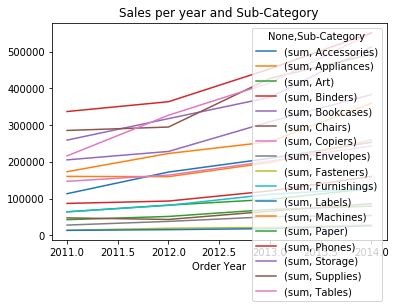

In [83]:
g_y_s_s = year_sub_sal.groupby(["Order Year", "Sub-Category"]).agg(['sum'])
a1 = g_y_s_s['Sales'].unstack().plot.line(title ='Sales per year and Sub-Category', legend = 'Value in usd')

In [79]:
year_sub_sal.groupby(["Order Year", "Sub-Category"]).describe()

Sales                                              \
                          count        mean          std     min        25%   
Order Year Sub-Category                                                       
2011       Accessories    537.0  211.277482   281.769010   1.980   61.02000   
           Appliances     326.0  531.851001   777.945292   2.394   80.38800   
           Art            846.0   75.814341    88.158941   1.344   22.22200   
           Binders       1064.0   81.765897   356.008803   0.852   12.55950   
           Bookcases      405.0  640.484656   613.433049  43.416  247.98000   
           Chairs         603.0  473.849048   542.847204  18.960  142.84800   
           Copiers        353.0  612.940204   503.898119  43.173  250.61400   
           Envelopes      384.0   72.881772    77.014057   1.632   23.51925   
           Fasteners      398.0   34.192378    29.368085   1.984   14.65290   
           Furnishings    584.0  109.475391   126.045550   3.480   32.84400   
           Labels         474.0   28.726704    33.308231   2.400   11.46600   
           Machines       279.0  575.432550  1549.672276  15.120  129.02400   
           Paper          623.0   68.484716    78.375708   3.380   19.40000   
           Phones         621.0  543.127987   778.816149   5.940  139.35000   
           Storage        910.0  225.963695   315.690852   2.799   48.00000   
           Supplies       421.0  113.018081   448.562913   2.920   35.37000   
           Tables         170.0  865.479375   755.914193  38.144  333.86250   
2012       Accessories    665.0  259.244639   342.502609   2.376   67.98000   
           Appliances     382.0  583.620327   737.620899   3.552   99.74400   
           Art           1066.0   77.259239    80.141740   1.780   23.47500   
           Binders       1283.0   72.812093   257.163124   0.984   12.85350   
           Bookcases      526.0  604.474239   596.876304  35.490  223.93800   
           Chairs         701.0  420.910328   539.766054  18.060  132.72000   
           Copiers        504.0  649.144045   598.206935  37.755  263.32200   
           Envelopes      548.0   69.368284    68.087665   2.160   24.28290   
           Fasteners      538.0   36.203892    29.966912   1.240   16.00500   
           Furnishings    653.0  125.274842   152.103705   2.960   37.80000   
           Labels         549.0   28.266431    36.588454   2.592   10.80000   
           Machines       320.0  499.559222   566.762885  18.564  149.28000   
           Paper          744.0   69.237069    72.056080   3.951   22.67000   
...                         ...         ...          ...     ...        ...   
2013       Bookcases      640.0  587.540312   579.644608  43.884  221.45400   
           Chairs         976.0  438.027022   515.404468  13.545  132.95250   
           Copiers        584.0  711.498097   970.668580  35.460  284.71308   
           Envelopes      696.0   72.996056    74.082869   2.272   24.60000   
           Fasteners      655.0   32.972356    27.125749   1.810   14.07000   
           Furnishings    871.0  128.380993   153.297202   2.328   33.99100   
           Labels         679.0   27.070382    31.839620   1.668   11.13000   
           Machines       369.0  537.604875   885.075776  11.560  122.37000   
           Paper          996.0   70.795738    73.840848   3.528   23.80275   
           Phones         893.0  507.860027   740.701649   5.500  134.85000   
           Storage       1320.0  234.451360   317.997652   3.078   48.00000   
           Supplies       639.0  103.150391   262.042390   5.040   34.92000   
           Tables         235.0  861.121426   764.417280  35.445  329.58900   
2014       Accessories   1033.0  245.390284   334.496452   0.990   71.98000   
           Appliances     590.0  609.808109   848.028713   0.444   99.69500   
           Art           1692.0   75.406413    82.192578   1.640   21.82275   
           Binders       2135.0   75.137979   252.238781   0.556   12.63600 

Binders are the most sold products (average per year) and labels are less sold. So they should focus on how to drag p those low sales, if the market is not yet satured.

In [85]:
g1 = ssd[['Order Year', 'Sub-Category', 'Sales', 'Profit']]

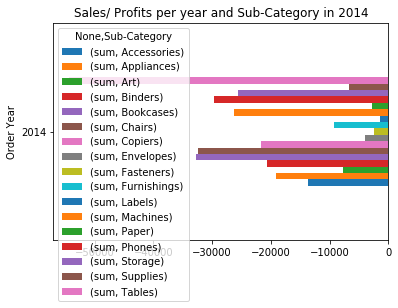

In [105]:
g2 = g1[g1['Order Year']==2014]
g3 = g2[g2['Profit']<0].groupby(["Order Year", "Sub-Category"]).agg(['sum'])
g3['Profit'].unstack().plot.barh(title ='Sales/ Profits per year and Sub-Category in 2014', legend = 'Value in usd')

But as loss of profit we can see that in 2014 the company is losing more than 54 thousands usd.